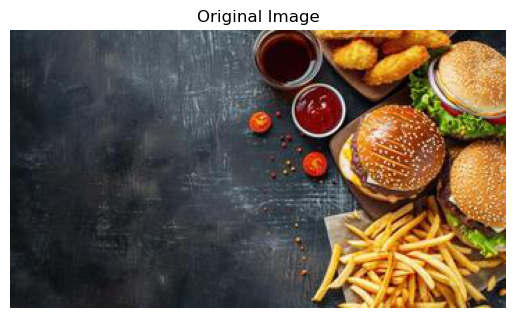

Image Dimensions: 200x357, Channels: 3


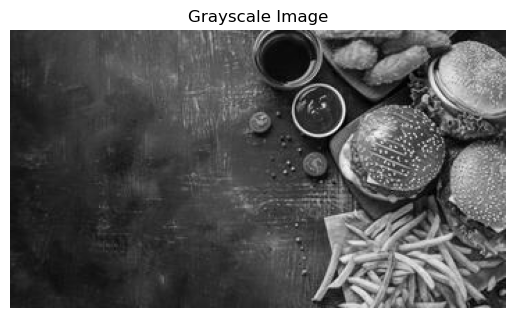

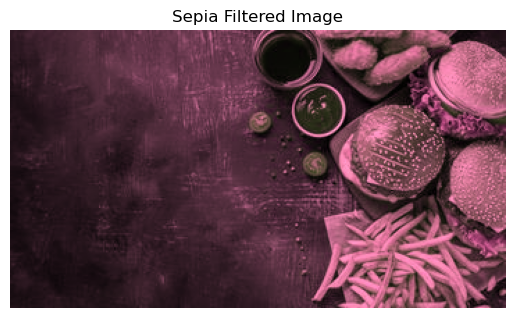

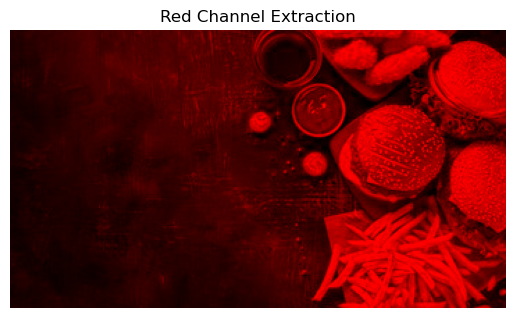

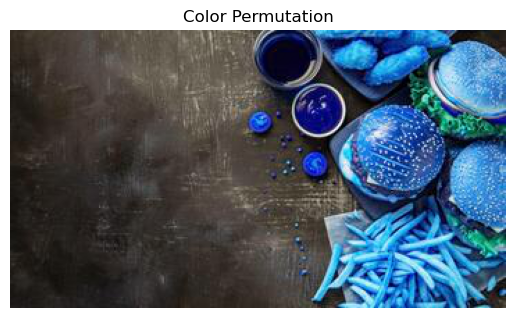

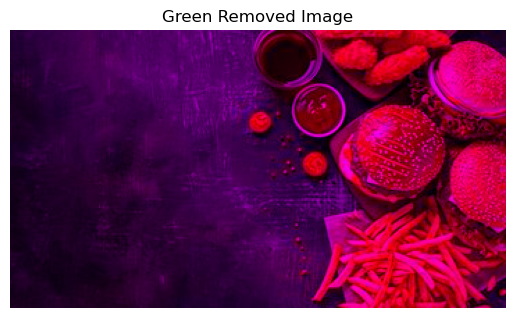

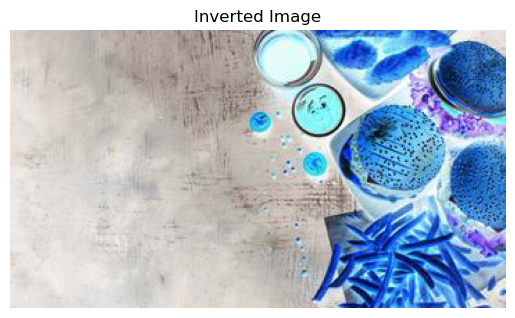

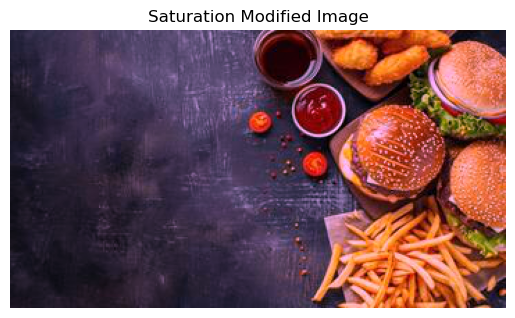

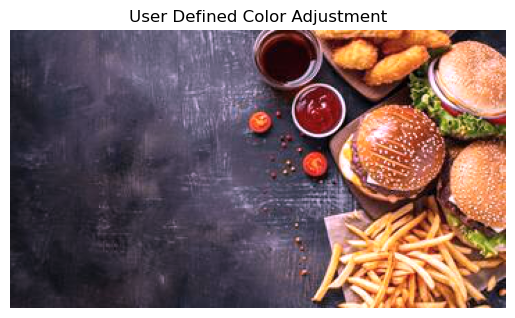

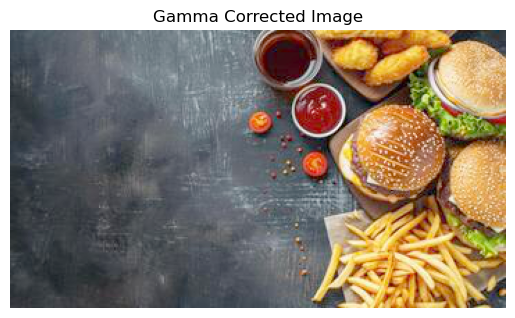

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def load_image(image_path):
    image = Image.open(r"pic1.jpg")
    image = np.array(image)
    return image

def display_image(image, title="Image"):
    plt.imshow(image.astype(np.uint8))
    plt.title(title)
    plt.axis("off")
    plt.show()

def extract_image_info(image):
    height, width, channels = image.shape
    print(f"Image Dimensions: {height}x{width}, Channels: {channels}")

def extract_channels(image):
    red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]
    return red, green, blue

def grayscale_conversion(image):
    grayscale = np.mean(image, axis=2)
    return np.stack([grayscale]*3, axis=-1)

def sepia_filter(image):
    sepia_matrix = np.array([[0.298, 0.732, 0.109],
                             [0.339, 0.126, 0.168],
                             [0.172, 0.534, 0.131]])
    sepia_image = image @ sepia_matrix.T
    return np.clip(sepia_image, 0, 255)

def red_channel_extraction(image):
    red_image = np.zeros_like(image)
    red_image[:,:,0] = image[:,:,0]
    return red_image

def color_permutation(image):
    permuted_image = image.copy()
    permuted_image[:,:,0], permuted_image[:,:,2] = image[:,:,2], image[:,:,0]
    return permuted_image

def remove_green(image):
    no_green = image.copy()
    no_green[:,:,1] = 0
    return no_green

def color_inversion(image):
    return 255 - image

def saturation_modification(image):
    modified_image = image.copy()
    modified_image[:,:,0] = np.clip(image[:,:,0] * 1.1, 0, 255)
    modified_image[:,:,2] = np.clip(image[:,:,2] * 1.12, 0, 255)
    modified_image[:,:,1] = np.clip(image[:,:,1] * 0.8, 0, 255)
    return modified_image

def user_defined_adjustment(image):
    adjustment_matrix = np.array([[1.1, 0.1, 0.1],
                                  [0.1, 0.9, 0.1],
                                  [0.1, 0.1, 1.1]])
    adjusted_image = image @ adjustment_matrix.T
    return np.clip(adjusted_image, 0, 255)

def gamma_correction(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    return np.clip((image / 255.0) ** inv_gamma * 255, 0, 255)


image_path = "image.jpg"
image = load_image(image_path)
display_image(image, "Original Image")
extract_image_info(image)


grayscale_img = grayscale_conversion(image)
display_image(grayscale_img, "Grayscale Image")

sepia_img = sepia_filter(image)
display_image(sepia_img, "Sepia Filtered Image")

red_img = red_channel_extraction(image)
display_image(red_img, "Red Channel Extraction")

permuted_img = color_permutation(image)
display_image(permuted_img, "Color Permutation")

no_green_img = remove_green(image)
display_image(no_green_img, "Green Removed Image")

inverted_img = color_inversion(image)
display_image(inverted_img, "Inverted Image")

saturated_img = saturation_modification(image)
display_image(saturated_img, "Saturation Modified Image")

adjusted_img = user_defined_adjustment(image)
display_image(adjusted_img, "User Defined Color Adjustment")

gamma_corrected_img = gamma_correction(image, 1.5)
display_image(gamma_corrected_img, "Gamma Corrected Image")
